<a href="https://colab.research.google.com/github/s-prak/FMML_Projects_and_Labs/blob/main/Copy_of_FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

%matplotlib inline is a magic function typically in python notebooks, where the plot is not displayed in a different window, but within the same notebook

First we need to define a labeled data set. Let's make a toy dataset.

In [8]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.


In the context of a perceptron or artificial neural networks, a bias term (often denoted as
�
b or
�
0
w
0
​
 ) is an additional parameter that is used to shift the output of the perceptron. It is conceptually similar to the intercept term in a linear equation.

In [9]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [10]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

In [ ]:
print(X)

[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]]


In [ ]:
print(enumerate(X))

In [ ]:
for d, sample in enumerate(X):
  print(d,sample)

0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]


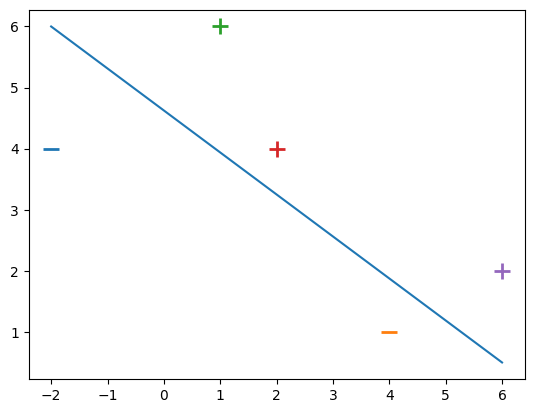

In [11]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
        #s parameter stands for "size,"
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

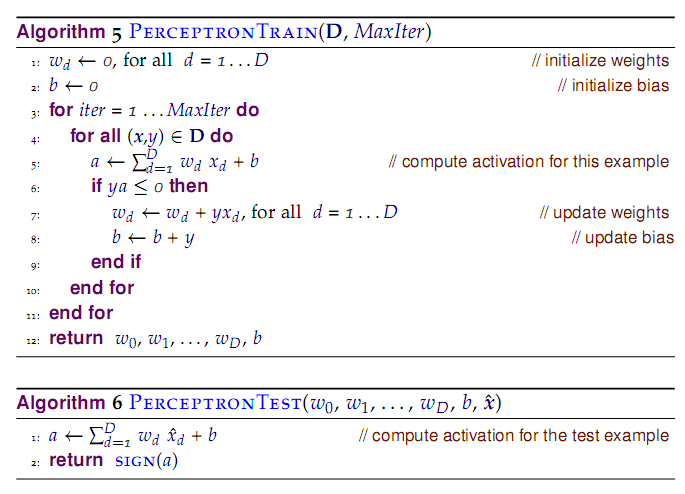

The algorithm is shown in the above image.

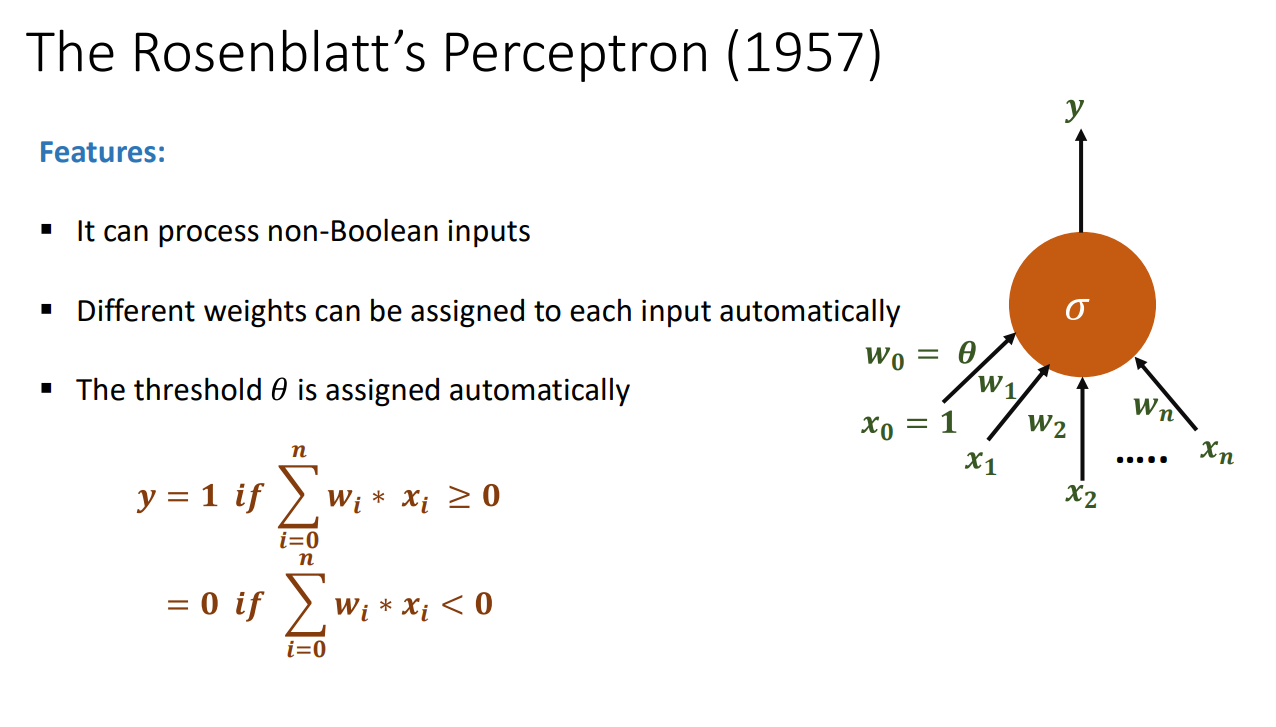

In the provided code, `eta` and `epochs` are hyperparameters that control the learning process in a perceptron algorithm. Here's what they mean:

1. **`eta` (Learning Rate):**
   - `eta` is the learning rate, which is a positive scalar that controls the step size or the rate at which the perceptron algorithm updates its weights during each iteration.
   - The learning rate is a crucial hyperparameter because it influences the convergence and stability of the training process. If the learning rate is too large, the algorithm may overshoot the optimal weights, and if it's too small, the algorithm may converge very slowly.
   - In the provided code, `eta = 1` indicates a relatively aggressive learning rate. You might need to experiment with different values to find an appropriate learning rate for your specific problem.

2. **`epochs`:**
   - An epoch is one complete pass through the entire training dataset.
   - The `epochs` parameter determines the number of times the algorithm will iterate over the entire dataset. Each iteration involves checking and updating the weights based on misclassifications.
   - Setting a specific number of epochs is necessary to ensure that the algorithm has seen the entire dataset multiple times, allowing it to adjust the weights and improve the model.
   - In the provided code, `epochs = 10` means that the perceptron algorithm will go through the entire dataset 10 times during training.

It's important to note that the choice of these hyperparameters can significantly impact the performance of the perceptron algorithm. The values of `eta` and `epochs` often require tuning based on the specific problem and dataset characteristics to achieve good convergence and accuracy. You may need to experiment with different values to find the optimal combination for your use case.

In [ ]:
print(len(X[0]))

3


In [ ]:
print(X[0])
w=[0,0,0]
print(np.dot(X[0],w))

[-2  4 -1]
0


In [ ]:
print(X[0]*2)

[-4  8 -2]


In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

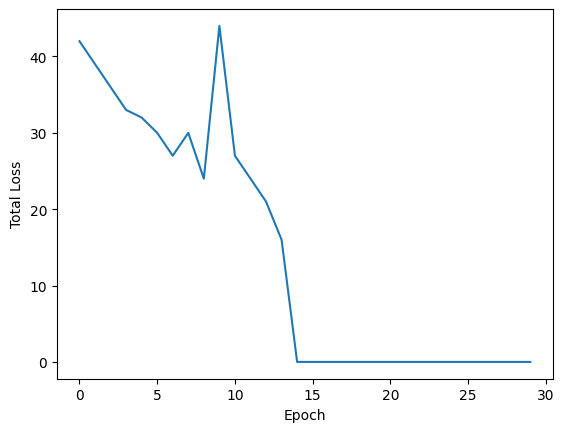

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

[[ 2.  3. -3.  2.]
 [ 2.  3.  3. -2.]]
(2.0, 2.0) (3.0, 3.0) (-3.0, 3.0) (2.0, -2.0)


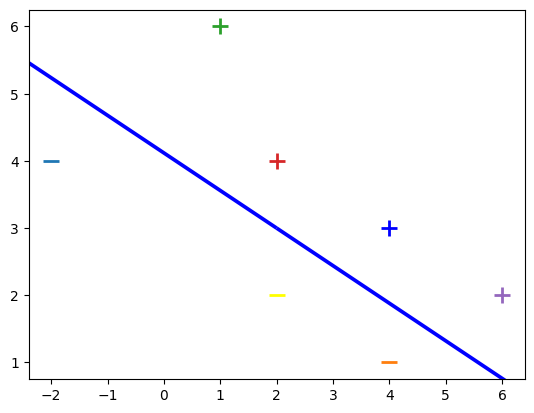

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]
#2points needed to plot a line

x2x3 = np.array([x2, x3])#->zipping into one list
print(x2x3)
X, Y, U, V = zip(*x2x3)#unzipping (zip(*variable))
print(X,Y,U,V)
ax = plt.gca()
#In Matplotlib, plt.gca() stands for "get current axis." This function is used to retrieve the current Axes instance (the set of axes) from the current figure.
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


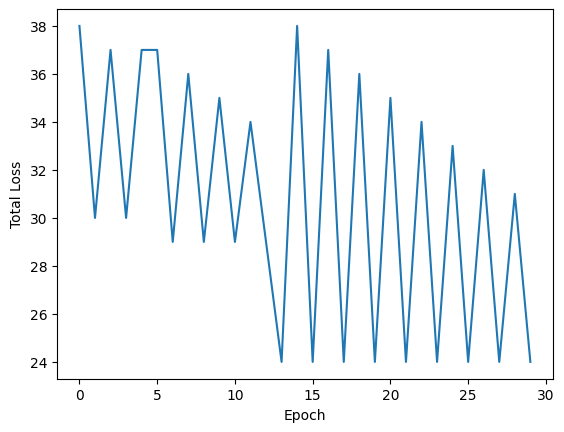

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

[0. 0. 0.]


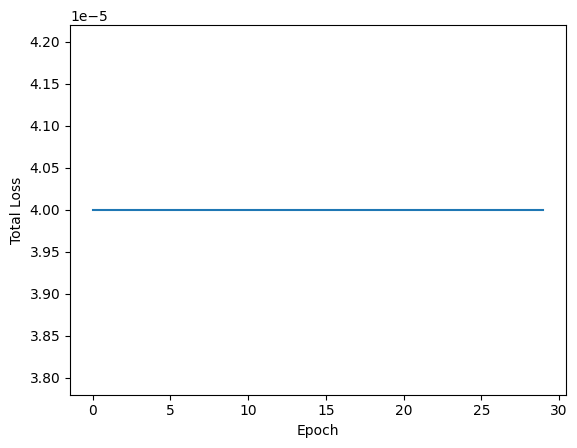

In [35]:
X = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1],
])
y = np.array([-1, 1, 1, -1])
print(perceptron_algo_plot(X, y))

with this example the loss does not converge, it remains constant

***Sonar Dataset***


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
sonar_data = fetch_openml(name='sonar', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [29]:
X=sonar_data.data
y=sonar_data.target

In [30]:
print(X)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

In [31]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [32]:
X.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [33]:
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: Class, dtype: category
Categories (2, object): ['Mine', 'Rock']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


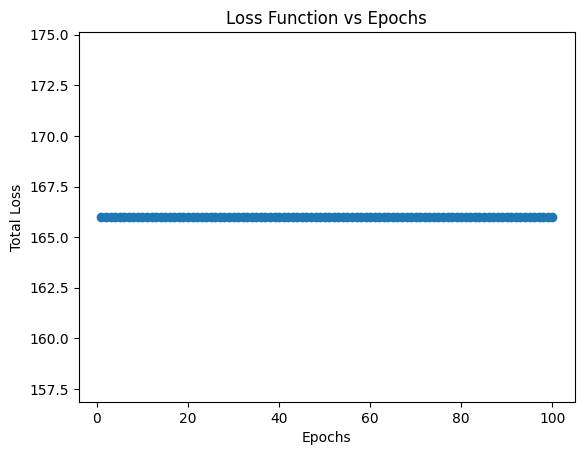

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load the sonar dataset
sonar_data = fetch_openml(name='sonar', version=1, as_frame=True)

# Extract features and labels
X = sonar_data.data
y = sonar_data.target

# Convert labels to numeric values (0 or 1)
y = y.map({'R': 0, 'M': 1})

# Combine features and labels into a single DataFrame
df = pd.concat([X, y], axis=1)

# Drop rows with NaN values
df = df.dropna()



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the perceptron algorithm
class CustomPerceptron:
    # ... (rest of the code)
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.losses = []

        for epoch in range(self.epochs):
            total_loss = 0
            for xi, target in zip(X.values, y):
                update = self.learning_rate
                self.weights[1:] += update * xi
                self.weights[0] += update
                total_loss += int(update != 0.0)

            self.losses.append(total_loss)

    def predict(self, xi):
        return np.where(np.dot(xi, self.weights[1:]) + self.weights[0] > 0.0, 1, 0)

# Create and train the custom perceptron model
custom_perceptron = CustomPerceptron(learning_rate=0.01, epochs=100)
custom_perceptron.fit(X_train, y_train)

y_pred = custom_perceptron.predict(X_test.values)

# Calculate accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the loss vs epochs graph
plt.plot(range(1, custom_perceptron.epochs + 1), custom_perceptron.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss Function vs Epochs')
plt.show()


*** Increasing learning rate***

In [23]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 100000
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [25]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 100000
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

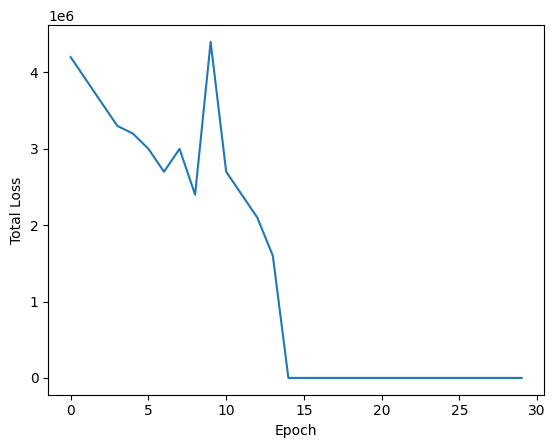

In [26]:
w = perceptron_algo_plot(X, y)

***Decreasing learning rate***

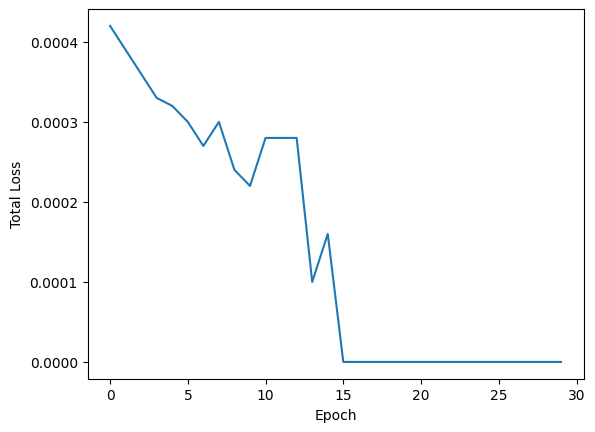

In [27]:

def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.00001
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 0.00001
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

w = perceptron_algo_plot(X, y)

Increasing or decreasing the learning rate, it will converge at the same iteration, that is 15